<a href="https://colab.research.google.com/github/Deepaksingh2610/ChatGPT-AI-based-English-to-French-language-Translator-/blob/main/genrativeaigfg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf  #text data into even clean data using normalization -> limitaization and many more.
import pathlib           #in this part we learn how to obtain data for transformer.
import zipfile

# Download the zip file
zip_path = tf.keras.utils.get_file(
    fname='fra-eng.zip',
    origin='http://storage.googleapis.com/download.tensorflow.org/data/fra-eng.zip'
)

# Get the directory where it was downloaded
data_dir = pathlib.Path(zip_path).parent

# Extract the zip manually
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(data_dir)

# Now point to the extracted file
text_file = data_dir / 'fra.txt'
print(text_file)

# Read the file
with open(text_file, 'r', encoding='utf-8') as fp:
    text_pair = [line for line in fp]

# Print first few lines
for line in text_pair[:10]:
    print(line.strip())

3423204/3423204 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
/root/.keras/datasets/fra.txt
Go.	Va !
Hi.	Salut !
Run!	Cours !
Run!	Courez !
Who?	Qui ?
Wow!	Ça alors !
Fire!	Au feu !
Help!	À l'aide !
Jump.	Saute.
Stop!	Ça suffit !


In [3]:
import unicodedata
import re

In [4]:
def normalize(line):    #creating space between the word and removing things and and character
  line = unicodedata.normalize('NFKC', line.strip().lower())
  line = re.sub(r'([,.!?])', r' \1', line)
  line = re.sub(r'[^a-zA-Z,.!?]+', r' ', line)
  eng , fre = line.split("\t")
  fre = '[start]' + fre + '[end]'
  return eng, fre


In [5]:
with open(text_file, 'r', encoding='utf-8') as fp:
    text_pair = [line for line in fp]



# Print first few lines

In [6]:
import random

for _ in range(5):
    print(random.choice(text_pair).strip()
    )

I never get to see you anymore.	Je n'ai plus l'occasion de te voir.
I know that Tom was early.	Je sais que Tom était arrivé tôt.
Do you want to come in?	Voulez-vous entrer ?
You don't expect me to face Tom alone, do you?	Tu ne t'attends pas à ce que je fasse face à Tom seul, n'est-ce pas ?
The news finally reached me last night.	Les nouvelles me sont enfin parvenues hier soir.


In [7]:
# Prepare token sets and max length counters
eng_vocab, fre_vocab = set(), set()
eng_maxlen, fre_maxlen = 0, 0

# Split each line into English and French
pairs = [line.strip().split('\t') for line in text_pair if '\t' in line]

# Iterate through the pairs
for eng, fre in pairs:
    eng_words = eng.split()
    fre_words = fre.split()

    # Update vocab sets
    eng_vocab.update(eng_words)
    fre_vocab.update(fre_words)

    # Track max sentence lengths
    eng_maxlen = max(eng_maxlen, len(eng_words))
    fre_maxlen = max(fre_maxlen, len(fre_words))

# Print results
print("Max English sentence length:", eng_maxlen)
print("Max French sentence length:", fre_maxlen)

Max English sentence length: 47
Max French sentence length: 54


In [8]:
import pickle

In [9]:
with open("text_pair.pickle", 'wb') as fp:
  pickle.dump(text_pair, fp)

In [10]:
# TRANSFORMER
# EMBEDDING LAYER
# POSITIONAL ENCODEING
# ATTENTION MODEL

In [11]:
from tensorflow.keras.layers import Embedding, TextVectorization  #for convert text data into vectorization & into number

In [12]:
import pickle

In [13]:
with open("text_pair.pickle", 'rb') as fp:
  text_pair = pickle.load(fp)

In [14]:
#divding data into text and traing part
random.shuffle(text_pair)
num_val_samples = int(0.15 * len(text_pair))
num_train_samples = len(text_pair) - 2 * num_val_samples

In [15]:
vocab_eng = 10000
vocab_fr  = 20000
seq_length = 25

In [17]:
# Extract raw text from your pairs
eng_texts, fre_texts = zip(*train_pair)

# Adapt the vectorizers
eng_vect.adapt(eng_texts)
fre_vect.adapt(fre_texts)


NameError: name 'train_pair' is not defined

In [ ]:
eng_vect = TextVectorization(max_tokens=vocab_eng, output_mode='int', output_sequence_length=seq_length)

In [ ]:
fre_vect = TextVectorization(max_tokens=vocab_fr, output_mode='int', output_sequence_length=seq_length+1)

In [ ]:
train_eng = [line.split('\t')[0] for line in text_pair[:num_train_samples]]
train_fre = [line.split('\t')[1] for line in text_pair[:num_train_samples]]

In [ ]:
eng_vect.adapt(train_eng)
fre_vect.adapt(train_fre)

In [ ]:
eng_vect.adapt(train_eng)
fre_vect.adapt(train_fre)

In [ ]:
import pickle

with open('vectorize.pickle', 'wb') as fp:
    data = {
        'train': text_pair[:num_train_samples],
        'test' : text_pair[num_train_samples:],

        'eng_vect': eng_vect.get_config(),
        'fre_vect': fre_vect.get_config(),
        'eng_weights': eng_vect.get_weights(),
        'fre_weights': fre_vect.get_weights()
    }
    pickle.dump(data, fp)

In [ ]:
with open("vectorize.pickle", 'rb') as fp:
  data = pickle.load(fp)

In [ ]:
train_pair = data['train']
train_pair = data['test']

eng_vect = TextVectorization.from_config(data['eng_vect'])
eng_vect.set_weights(data['eng_weights'])

fre_vect = TextVectorization.from_config(data['fre_vect'])
fre_vect.set_weights(data['fre_weights'])

In [ ]:
#create function which help for transforme the data

In [ ]:
# Split raw lines into (eng, fre) tuples
text_pair = [line.strip().split('\t') for line in text_pair if '\t' in line]

# Shuffle and split
import random
random.shuffle(text_pair)

total_size = len(text_pair)
train_size = int(0.8 * total_size)
val_size = int(0.1 * total_size)

train_pair = text_pair[:train_size]
val_pair   = text_pair[train_size:train_size + val_size]
test_pair  = text_pair[train_size + val_size:]

In [ ]:
eng_vect.adapt([eng for eng, _ in train_pair])
fre_vect.adapt([fre for _, fre in train_pair])

In [ ]:
def format_dataset(eng, fre):
    return {
        "encoder_inputs": eng,
        "decoder_inputs": fre[:, :-1]
    }, fre[:, 1:]



In [ ]:
def make_dataset(pair, batchsize=64):
    if not pair or not all(isinstance(p, (list, tuple)) and len(p) == 2 for p in pair):
        raise ValueError("Input 'pair' must be a non-empty list of (eng, fre) tuples.")

    eng_texts, fre_texts = zip(*pair)
    dataset = tf.data.Dataset.from_tensor_slices((list(eng_texts), list(fre_texts)))
    dataset = dataset.map(lambda eng, fre: (eng_vect(eng), fre_vect(fre)))
    dataset = dataset.map(format_dataset)
    dataset = dataset.shuffle(2048).batch(batchsize).prefetch(tf.data.AUTOTUNE).cache()
    return dataset

In [ ]:
def format_dataset(eng, fre):
    return {
        "encoder_inputs": eng,
        "decoder_inputs": fre[:-1]  # Slice 1D tensor
    }, fre[1:]  # Target is shifted version

In [ ]:
train_ds = make_dataset(train_pair)
val_ds = make_dataset(val_pair)

In [ ]:
for inputs, target in train_ds.take(1):  #vector of english -> frenvh -> and target valure avilabele.
    print(inputs['encoder_inputs'].shape)
    print(inputs['encoder_inputs'][0])
    print(inputs['decoder_inputs'].shape)
    print(inputs['decoder_inputs'][0])
    print(target.shape)
    print(target[0])

In [ ]:
test_ds = make_dataset(test_pair)

In [ ]:
#positional embedding to perform on the embedding vector


In [ ]:
import numpy as np
import tensorflow as tf

def pos_enc_matrix(L, d, n= 10000):

  assert d%2 ==0
  d2 = d//2

  P = np.zeros((L,d))
  k =np.arange(L).reshape(-1,1)
  i =np.arange(d2).reshape(1,-1)

  denom = np.power(n, -i/d2)
  args = k*denom

  P[:, ::2] =np.sin(args)
  P[:, 1::2]=np.cos(args)
  return P

In [ ]:
class PositionalEmbedding(tf.keras.layers.Layer):

  def __init__(self, sequence_length, vocab_size, embed_dim, **kwargs):
    super().__init__(**kwargs)
    self.sequence_length = sequence_length
    self.vocab_size = vocab_size
    self.embed_dim = embed_dim

    self.token_embeddings = tf.keras.layers.Embedding(
        input_dim=vocab_size, output_dim=embed_dim, mask_zero=True
    )
    matrix = pos_enc_matrix(sequence_length, embed_dim, n=10000)
    self.position_embeddings = tf.constant(matrix, dtype=tf.float32)




    def call(self, inputs):
      embedded_tokens = self.token_embeddings(inputs)
      embedded_tokens *= tf.math.sqrt(tf.cast(self.embed_dim, tf.float32))
      return embedded_tokens + self.position_embeddings

    def compute_mask(self, *args, **kwargs):
      return self.token_embeddings.compute_mask(*args, **kwargs)

    def get_config(self):
      config = super().get_config()
      config.Update({
          "sequence_length": self.sequence_length,
          "vocab_size": self.vocab_size,
          "embed_dim": self.embed_dim
      })
      return config


In [ ]:
vocab_eng = 10000
seq_length = 20

In [ ]:
for inputs, target in train_ds.take(1):
  print(inputs['encoder_inputs'])
  embed_en = PositionalEmbedding(seq_length, vocab_eng, embed_dim=512)
  en_emb = (inputs['encoder_inputs'])

In [ ]:
#neural networks

In [ ]:
#self attention & corres attention

In [ ]:
tf.keras.layers.LayerNormalization()

In [ ]:
def self_attention(input_shape, prfix='att', mask=False, **kwargs):
    inputs = tf.keras.layers.Input(shape=input_shape, dtype='float32', name=f"{prfix}_in1")

    # Extract expected arguments from kwargs
    num_heads = kwargs.get("num_heads", 8)
    key_dim = kwargs.get("key_dim", 128)

    attention = tf.keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=key_dim, name=f"{prfix}_att1")
    norm = tf.keras.layers.LayerNormalization(name=f"{prfix}_norm1")
    add = tf.keras.layers.Add(name=f"{prfix}_add1")

    # Apply attention with causal mask if needed
    attout = attention(query=inputs, value=inputs, key=inputs, use_causal_mask=mask)

    # Residual connection + normalization
    output = norm(add([inputs, attout]))

    model = tf.keras.Model(inputs=inputs, outputs=output, name=f"{prfix}_att")
    return model

In [ ]:
seq_length = 25
key_dim = 128
num_heads = 8

model = self_attention(input_shape=(seq_length, key_dim), num_heads=num_heads, key_dim=key_dim)
model.summary()

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
def cross_attention(input_shape, context_shape, prfix='att', **kwargs):

  context = tf.keras.layers.Input(shape=context_shape, dtype='float32', name=f"{prfix}_ctx2")
  inputs = tf.keras.layers.Input(shape=input_shape, dtype='float32', name=f"{prfix}_in2")
  attention = tf.keras.layers.MultiHeadAttention(name=f"{prfix}_att2", **kwargs)
  norm = tf.keras.layers.LayerNormalization(name=f"{prfix}_norm2")
  add = tf.keras.layers.Add(name=f"{prfix}_add2")


  attout = attention(query=inputs, value=context, key=context)
  output = norm(add([inputs, attout]))

  model = tf.keras.Model(inputs=[context, inputs], outputs=output, name=f"{prfix}_crs_at")

  return model




In [ ]:
model =  cross_attention(input_shape=(seq_length, key_dim), context_shape=(seq_length, key_dim), num_heads=num_heads, key_dim=key_dim)
model.summary()

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
def feed_forward(input_shape, model_dim, ff_dim, dropout = .1, prefix = 'ff'):

  inputs = tf.keras.layers.Input(shape = input_shape ,  dtype = 'float32' , name = f"{prefix}_in3")
  dense1 = tf.keras.layers.Dense(ff_dim, activation = 'relu', name = f"{prefix}_ff1")
  dense2 = tf.keras.layers.Dense(model_dim, name = f"{prefix}_ff2")
  dropout = tf.keras.layers.Dropout(dropout, name = f"{prefix}_drop")
  add = tf.keras.layers.Add(name = f"{prefix}_add3")
  norm = tf.keras.layers.LayerNormalization(name = f"{prefix}_norm3")

  ffout = dense2(dense1(inputs))
  ffout = dropout(ffout)
  output = norm(add([inputs, ffout]))

  model = tf.keras.Model(inputs = inputs, outputs = output, name = f"{prefix}_ff")

  return model

In [ ]:
ff_dim = 512

model = feed_forward(input_shape=(seq_length, key_dim), model_dim=key_dim, ff_dim=ff_dim)
model.summary()

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
# encoder & decoder

In [ ]:
import tensorflow as tf

# # Custom Multi-Head Self-Attention Layer
# def self_attention(input_shape, prefix='att', num_heads=8, key_dim=128):
#     return tf.keras.layers.MultiHeadAttention(
#         num_heads=num_heads,
#         key_dim=key_dim,
#         name=f"{prefix}_mha"
#     )

# # Custom Feed-Forward Network
# def feed_forward(model_dim, ff_dim, dropout=0.1, prefix='ff'):
#     return tf.keras.Sequential([
#         tf.keras.layers.Dense(ff_dim, activation='relu', name=f"{prefix}_dense1"),
#         tf.keras.layers.Dropout(dropout, name=f"{prefix}_dropout"),
#         tf.keras.layers.Dense(model_dim, name=f"{prefix}_dense2")
#     ], name=f"{prefix}_ffn")

# Encoder Block using Functional API
def encoder(input_shape, key_dim, ff_dim, num_heads=8, dropout=0.1, prefix='enc'):
    inputs = tf.keras.Input(shape=input_shape, dtype='float32', name=f"{prefix}_input")

    # Self-Attention
    attn_layer = self_attention(input_shape, prefix=f"{prefix}_att", num_heads=num_heads, key_dim=key_dim)
    attn_output = attn_layer(inputs, inputs)
    attn_output = tf.keras.layers.LayerNormalization(name=f"{prefix}_att_norm")(attn_output + inputs)

    # Feed-Forward
    ff_layer = feed_forward(model_dim=key_dim, ff_dim=ff_dim, dropout=dropout, prefix=f"{prefix}_ff")
    ff_output = ff_layer(attn_output)
    ff_output = tf.keras.layers.LayerNormalization(name=f"{prefix}_ff_norm")(ff_output + attn_output)

    return tf.keras.Model(inputs=inputs, outputs=ff_output, name=f"{prefix}_block")

# Parameters
seq_length = 25
key_dim = 128
ff_dim = 512
num_heads = 8

# Build Model
model = encoder(input_shape=(seq_length, key_dim), key_dim=key_dim, ff_dim=ff_dim, num_heads=num_heads)
model.summary()

In [ ]:
tf.keras.utils.plot_model(model)

In [ ]:
import tensorflow as tf

# 🔹 Self-Attention Layer
def self_attention(key_dim, num_heads=8, prefix='att'):
    return tf.keras.layers.MultiHeadAttention(
        num_heads=num_heads,
        key_dim=key_dim,
        attention_axes=(1,),
        name=f"{prefix}_self_attn"
    )

# 🔹 Cross-Attention Layer
def cross_attention(key_dim, num_heads=8, prefix='cross'):
    return tf.keras.layers.MultiHeadAttention(
        num_heads=num_heads,
        key_dim=key_dim,
        attention_axes=(1,),
        name=f"{prefix}_cross_attn"
    )

# 🔹 Feed-Forward Network
def feed_forward(model_dim, ff_dim, dropout=0.1, prefix='ff'):
    return tf.keras.Sequential([
        tf.keras.layers.Dense(ff_dim, activation='relu', name=f"{prefix}_dense1"),
        tf.keras.layers.Dropout(dropout, name=f"{prefix}_dropout"),
        tf.keras.layers.Dense(model_dim, name=f"{prefix}_dense2")
    ], name=f"{prefix}_ffn")

# 🔹 Decoder Block
def decoder(input_shape, key_dim, ff_dim, dropout=0.1, prefix='dec', num_heads=8):
    # Inputs
    inputs = tf.keras.Input(shape=input_shape, dtype='float32', name=f"{prefix}_input")     # target sequence
    context = tf.keras.Input(shape=input_shape, dtype='float32', name=f"{prefix}_context")  # encoder output

    # Self-Attention
    self_attn = self_attention(key_dim=key_dim, num_heads=num_heads, prefix=f"{prefix}_self")
    x = self_attn(query=inputs, value=inputs)
    x = tf.keras.layers.LayerNormalization(name=f"{prefix}_self_norm")(x + inputs)

    # Cross-Attention
    cross_attn = cross_attention(key_dim=key_dim, num_heads=num_heads, prefix=f"{prefix}_cross")
    x2 = cross_attn(query=x, value=context)
    x2 = tf.keras.layers.LayerNormalization(name=f"{prefix}_cross_norm")(x2 + x)

    # Feed-Forward
    ff = feed_forward(model_dim=key_dim, ff_dim=ff_dim, dropout=dropout, prefix=f"{prefix}_ff")
    x3 = ff(x2)
    x3 = tf.keras.layers.LayerNormalization(name=f"{prefix}_ff_norm")(x3 + x2)

    # Final Model
    return tf.keras.Model(inputs=[context, inputs], outputs=x3, name=f"{prefix}_block")

# 🔹 Parameters
seq_length = 25
key_dim = 128
ff_dim = 512
num_heads = 8

# 🔹 Build and Summarize Decoder Model
model = decoder(input_shape=(seq_length, key_dim), key_dim=key_dim, ff_dim=ff_dim, num_heads=num_heads)
model.summary()

In [ ]:
tf.keras.utils.plot_model(model)

In [ ]:
import tensorflow as tf

# Define PositionalEmbedding layer
class PositionalEmbedding(tf.keras.layers.Layer):
    def __init__(self, sequence_length, vocab_size, embed_dim):
        super(PositionalEmbedding, self).__init__()
        self.token_emb = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = tf.keras.layers.Embedding(input_dim=sequence_length, output_dim=embed_dim)

    def call(self, x):
        positions = tf.range(start=0, limit=tf.shape(x)[-1], delta=1)
        embedded_positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + embedded_positions


In [19]:
import tensorflow as tf

# Positional Embedding Layer
class PositionalEmbedding(tf.keras.layers.Layer):
    def __init__(self, sequence_length, vocab_size, embed_dim):
        super(PositionalEmbedding, self).__init__()
        self.token_emb = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = tf.keras.layers.Embedding(input_dim=sequence_length, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

# Multi-Head Self Attention Wrapper
def self_attention_layer(key_dim, num_heads, dropout, name):
    return tf.keras.Sequential([
        tf.keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=key_dim, name=f"{name}_mha"),
        tf.keras.layers.Dropout(dropout),
        tf.keras.layers.LayerNormalization(epsilon=1e-6, name=f"{name}_norm")
    ], name=name)

# Feed Forward Layer
def feed_forward(ff_dim, key_dim, dropout, name):
    return tf.keras.Sequential([
        tf.keras.layers.Dense(ff_dim, activation='relu', name=f"{name}_dense1"),
        tf.keras.layers.Dropout(dropout),
        tf.keras.layers.Dense(key_dim, name=f"{name}_dense2"),
        tf.keras.layers.LayerNormalization(epsilon=1e-6, name=f"{name}_norm")
    ], name=name)

# Encoder Block
def encoder(input_shape, key_dim, ff_dim, num_heads, dropout, prefix):
    inputs = tf.keras.Input(shape=input_shape, name=f"{prefix}_input")
    x = tf.keras.layers.LayerNormalization()(inputs)

    attn_output = tf.keras.layers.MultiHeadAttention(
        num_heads=num_heads, key_dim=key_dim, name=f"{prefix}_attn"
    )(x, x)
    x = tf.keras.layers.Add()([x, attn_output])
    x = tf.keras.layers.LayerNormalization()(x)

    ffn_output = tf.keras.Sequential([
        tf.keras.layers.Dense(ff_dim, activation='relu'),
        tf.keras.layers.Dense(key_dim),
    ])(x)
    x = tf.keras.layers.Add()([x, ffn_output])
    return tf.keras.Model(inputs, x, name=prefix)

# Decoder Block
def decoder(input_shape, key_dim, ff_dim, num_heads, dropout, prefix):
    x_input = tf.keras.Input(shape=input_shape, name=f"{prefix}_input")
    enc_output = tf.keras.Input(shape=input_shape, name=f"{prefix}_enc_output")

    x = tf.keras.layers.LayerNormalization()(x_input)

    # Masked multi-head attention (self-attention in decoder)
    attn1 = tf.keras.layers.MultiHeadAttention(
        num_heads=num_heads, key_dim=key_dim, name=f"{prefix}_attn1"
    )(x, x)
    x = tf.keras.layers.Add()([x, attn1])
    x = tf.keras.layers.LayerNormalization()(x)

    # Multi-head attention with encoder output
    attn2 = tf.keras.layers.MultiHeadAttention(
        num_heads=num_heads, key_dim=key_dim, name=f"{prefix}_attn2"
    )(x, enc_output)
    x = tf.keras.layers.Add()([x, attn2])
    x = tf.keras.layers.LayerNormalization()(x)

    ffn_output = tf.keras.Sequential([
        tf.keras.layers.Dense(ff_dim, activation='relu'),
        tf.keras.layers.Dense(key_dim),
    ])(x)
    x = tf.keras.layers.Add()([x, ffn_output])

    return tf.keras.Model([enc_output, x_input], x, name=prefix)

# Full Transformer Model
def transformer(num_layers, num_heads, seq_length, key_dim, ff_dim, vocab_size_en, vocab_size_fr, dropout=0.1, name='transformer'):
    input_enc = tf.keras.layers.Input(shape=(seq_length,), dtype='int32', name='input_enc')
    input_dec = tf.keras.layers.Input(shape=(seq_length,), dtype='int32', name='input_dec')

    embed_enc = PositionalEmbedding(seq_length, vocab_size_en, key_dim)(input_enc)
    embed_dec = PositionalEmbedding(seq_length, vocab_size_fr, key_dim)(input_dec)

    encoder_layers = [
        encoder(input_shape=(seq_length, key_dim), key_dim=key_dim, ff_dim=ff_dim,
                dropout=dropout, prefix=f"enc{i}", num_heads=num_heads)
        for i in range(num_layers)
    ]

    decoder_layers = [
        decoder(input_shape=(seq_length, key_dim), key_dim=key_dim, ff_dim=ff_dim,
                dropout=dropout, prefix=f"dec{i}", num_heads=num_heads)
        for i in range(num_layers)
    ]

    x1 = embed_enc
    for enc in encoder_layers:
        x1 = enc(x1)

    x2 = embed_dec
    for dec in decoder_layers:
        x2 = dec([x1, x2])

    output = tf.keras.layers.Dense(vocab_size_fr, name='linear')(x2)

    try:
        del output._keras_mask
    except:
        pass

    model = tf.keras.Model(inputs=[input_enc, input_dec], outputs=output, name=name)
    return model




In [20]:
seq_length = 25
num_layers = 4
num_heads = 8
key_dim = 128
ff_dim = 512
dropout = 0.1
vocab_size_en = 10000
vocab_size_fr = 10000

model = transformer(num_layers, num_heads, seq_length, key_dim, ff_dim, vocab_size_en, vocab_size_fr, dropout)
model.summary()


Model: "transformer"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_enc           │ (None, 25)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ positional_embeddi… │ (None, 25, 128)   │  1,283,200 │ input_enc[0][0]   │
│ (PositionalEmbeddi… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ enc0 (Functional)   │ (None, 25, 128)   │    659,712 │ positional_embed… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ enc1 (Functional)   │ (None, 25, 128)   │    659,712 │ enc0[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ enc2 (Functional)   │ (None, 25, 128)   │    659,712 │ enc1[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_dec           │ (None, 25)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ enc3 (Functional)   │ (None, 25, 128)   │    659,712 │ enc2[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ positional_embeddi… │ (None, 25, 128)   │  1,283,200 │ input_dec[0][0]   │
│ (PositionalEmbeddi… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dec0 (Functional)   │ (None, 25, 128)   │  1,187,456 │ enc3[0][0],       │
│                     │                   │            │ positional_embed… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dec1 (Functional)   │ (None, 25, 128)   │  1,187,456 │ enc3[0][0],       │
│                     │                   │            │ dec0[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dec2 (Functional)   │ (None, 25, 128)   │  1,187,456 │ enc3[0][0],       │
│                     │                   │            │ dec1[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dec3 (Functional)   │ (None, 25, 128)   │  1,187,456 │ enc3[0][0],       │
│                     │                   │            │ dec2[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ linear (Dense)      │ (None, 25, 10000) │  1,290,000 │ dec3[0][0]        │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 11,245,072 (42.90 MB)

 Trainable params: 11,245,072 (42.90 MB)

 Non-trainable params: 0 (0.00 B)

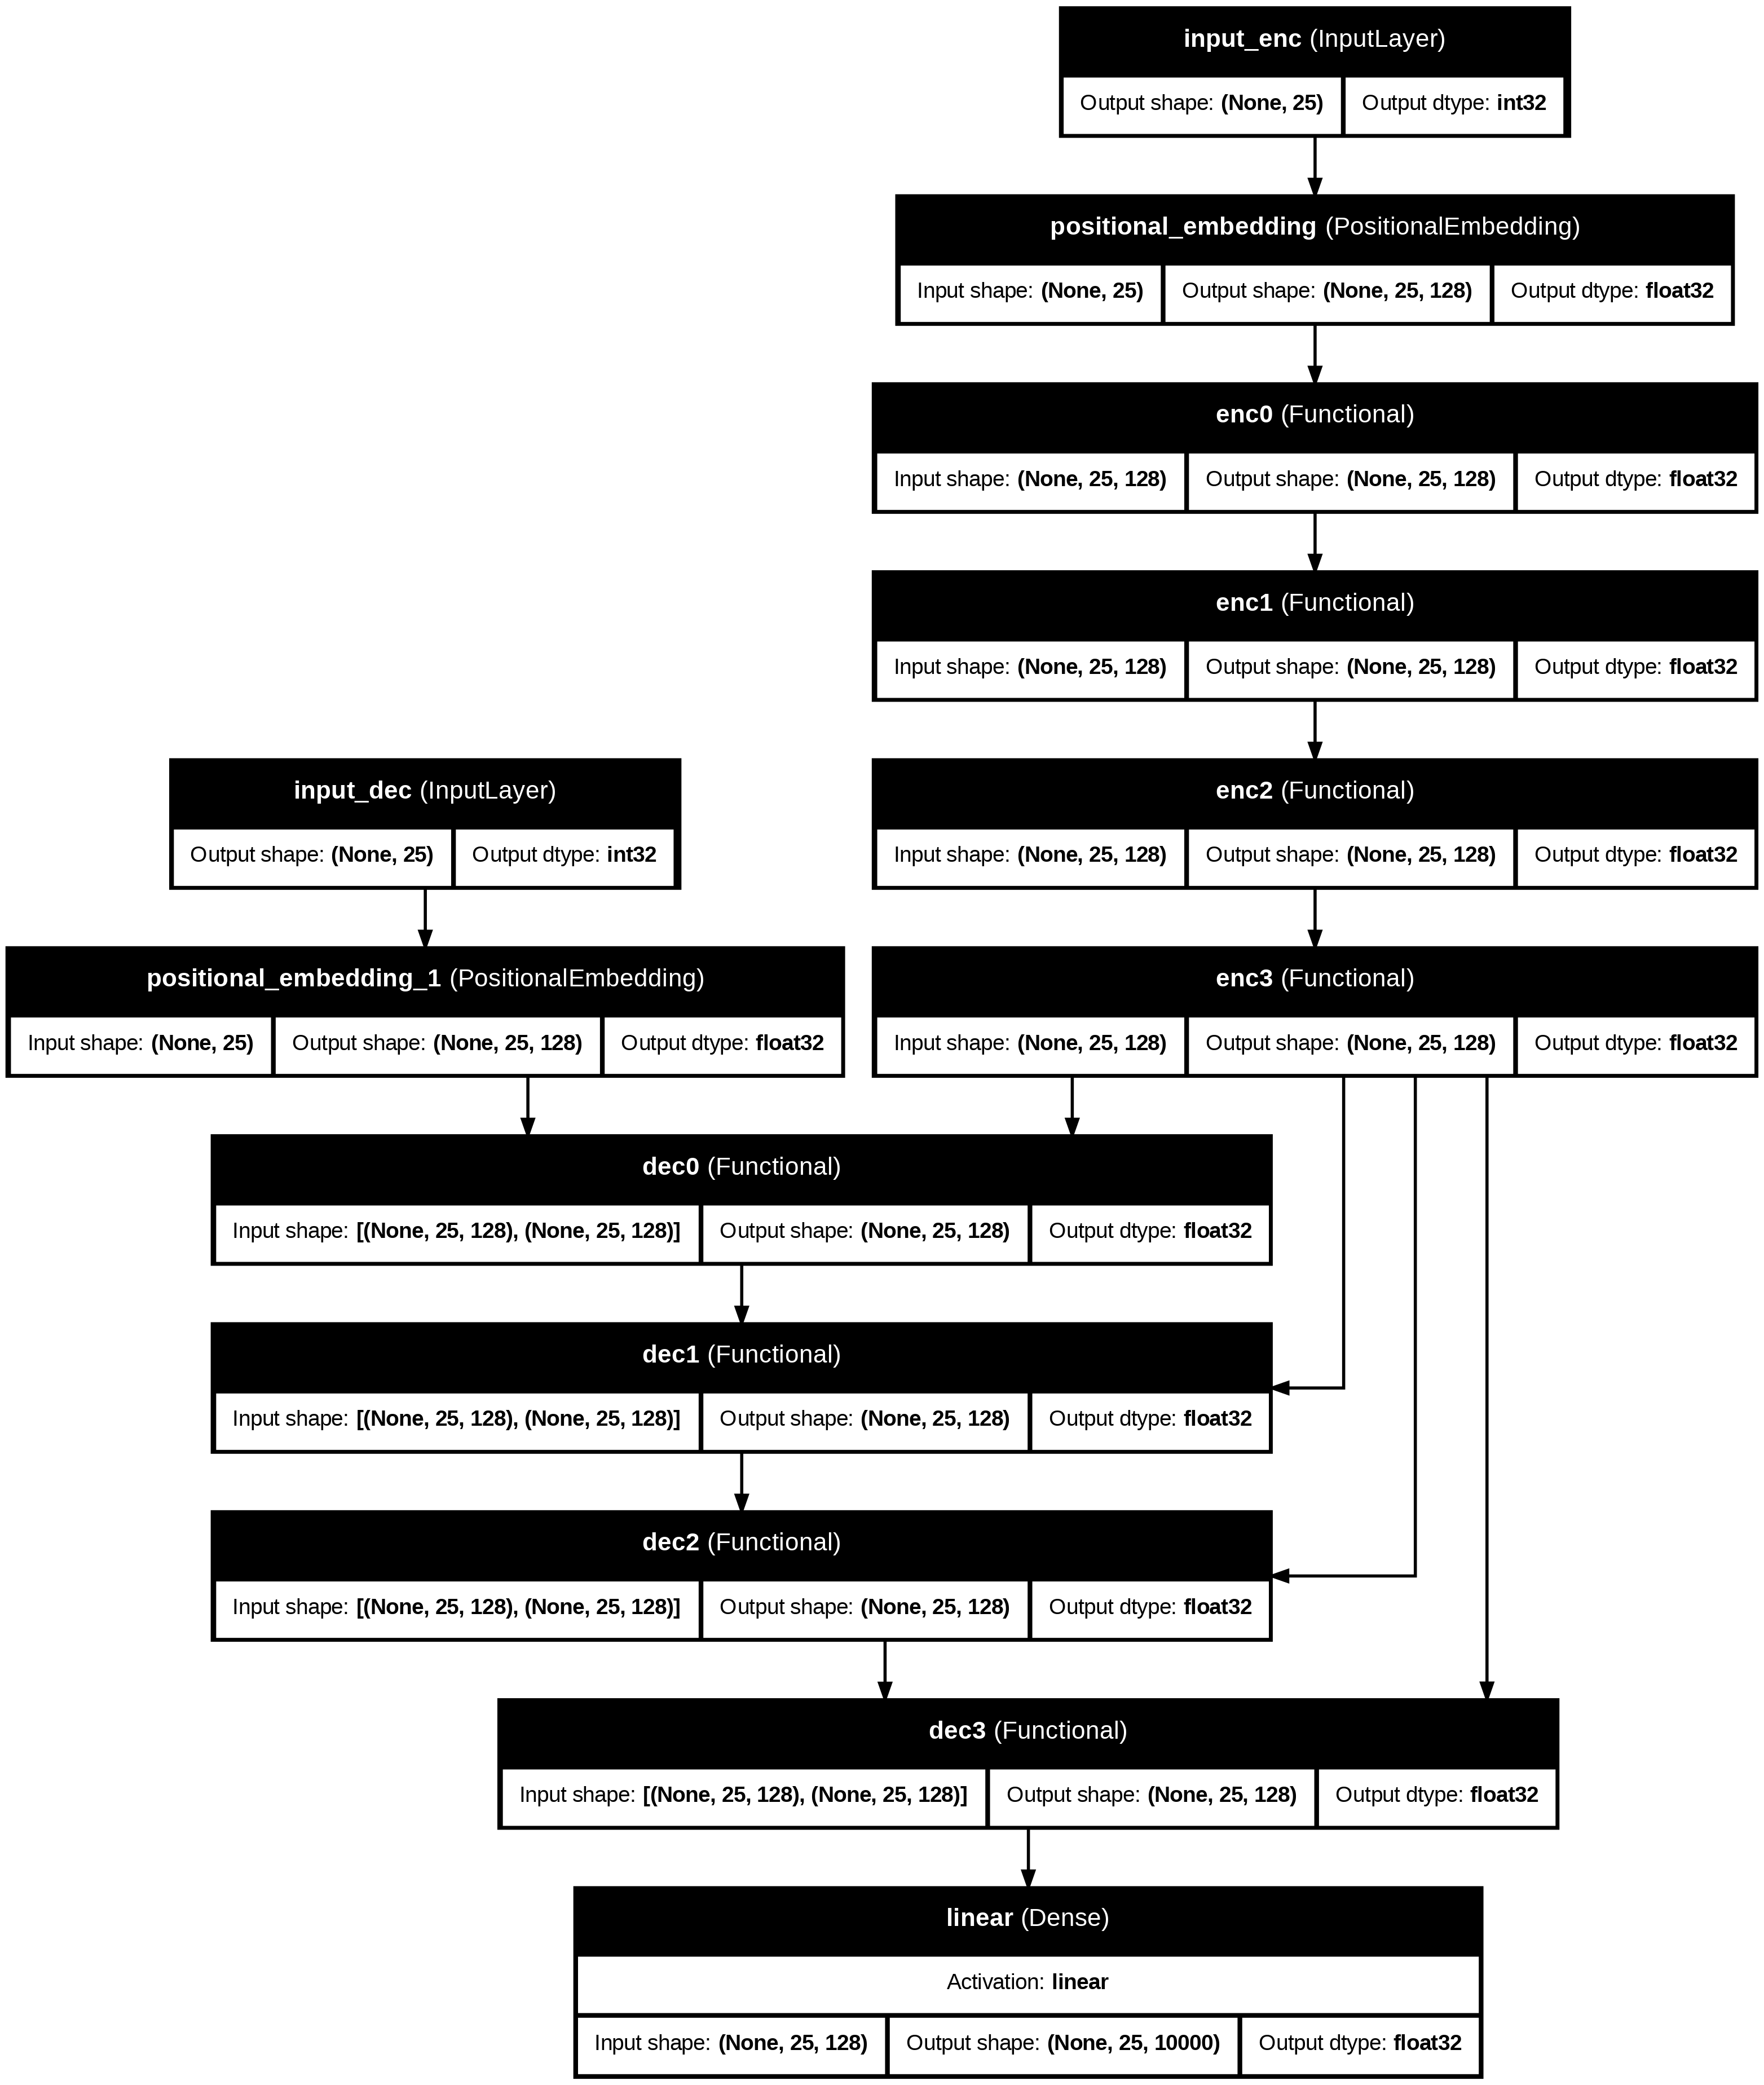

In [21]:
tf.keras.utils.plot_model(model, show_shapes=True , show_dtype=True , show_layer_names=True, show_layer_activations= True)

In [22]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [23]:
model.summary()

Model: "transformer"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_enc           │ (None, 25)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ positional_embeddi… │ (None, 25, 128)   │  1,283,200 │ input_enc[0][0]   │
│ (PositionalEmbeddi… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ enc0 (Functional)   │ (None, 25, 128)   │    659,712 │ positional_embed… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ enc1 (Functional)   │ (None, 25, 128)   │    659,712 │ enc0[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ enc2 (Functional)   │ (None, 25, 128)   │    659,712 │ enc1[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_dec           │ (None, 25)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ enc3 (Functional)   │ (None, 25, 128)   │    659,712 │ enc2[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ positional_embeddi… │ (None, 25, 128)   │  1,283,200 │ input_dec[0][0]   │
│ (PositionalEmbeddi… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dec0 (Functional)   │ (None, 25, 128)   │  1,187,456 │ enc3[0][0],       │
│                     │                   │            │ positional_embed… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dec1 (Functional)   │ (None, 25, 128)   │  1,187,456 │ enc3[0][0],       │
│                     │                   │            │ dec0[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dec2 (Functional)   │ (None, 25, 128)   │  1,187,456 │ enc3[0][0],       │
│                     │                   │            │ dec1[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dec3 (Functional)   │ (None, 25, 128)   │  1,187,456 │ enc3[0][0],       │
│                     │                   │            │ dec2[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ linear (Dense)      │ (None, 25, 10000) │  1,290,000 │ dec3[0][0]        │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 11,245,072 (42.90 MB)

 Trainable params: 11,245,072 (42.90 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#lest train this model

In [24]:
import tensorflow as tf
import numpy as np

# Dummy English-French tokenized sentences
num_samples = 1000
seq_length = 25
vocab_size_en = 10000
vocab_size_fr = 10000

# Random integer sequences (simulating tokenized sentences)
X_train = np.random.randint(0, vocab_size_en, size=(num_samples, seq_length))
Y_train = np.random.randint(0, vocab_size_fr, size=(num_samples, seq_length))

X_val = np.random.randint(0, vocab_size_en, size=(200, seq_length))
Y_val = np.random.randint(0, vocab_size_fr, size=(200, seq_length))

# Create tf.data.Dataset
train_ds = tf.data.Dataset.from_tensor_slices(((X_train, Y_train), Y_train))
train_ds = train_ds.shuffle(1000).batch(32)

val_ds = tf.data.Dataset.from_tensor_slices(((X_val, Y_val), Y_val))
val_ds = val_ds.batch(32)


In [25]:
history = model.fit(train_ds, epochs=20, validation_data=val_ds)

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 126s 3s/step - accuracy: 1.0122e-04 - loss: 14.5140 - val_accuracy: 0.0000e+00 - val_loss: 13.9530
Epoch 2/20


KeyboardInterrupt: 

In [26]:
import tensorflow as tf

class customSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, d_model, warmup_steps=40000):
        super().__init__()
        self.key_dim = d_model
        self.warmup_steps = warmup_steps
        self.d = tf.cast(self.key_dim, tf.float32)

    def __call__(self, step):
        step = tf.cast(step, tf.float32)
        arg1 = tf.math.rsqrt(step)  # ✅ corrected here
        arg2 = step * (self.warmup_steps ** -1.5)
        return tf.math.rsqrt(self.d) * tf.math.minimum(arg1, arg2)

    def get_config(self):
        return {
            "key_dim": self.key_dim,
            "warmup_steps": self.warmup_steps
        }

# ✅ Instantiate learning rate schedule and optimizer
key_dim = 128


In [27]:
# ✅ Masked Loss Function
def masked_loss(label, pred):
    mask = label != 0

    loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
        from_logits=True, reduction='none'
    )
    loss = loss_object(label, pred)

    mask = tf.cast(mask, dtype=loss.dtype)
    loss *= mask

    return tf.reduce_sum(loss) / tf.reduce_sum(mask)

# ✅ Masked Accuracy Function
def masked_accuracy(label, pred):
    pred = tf.argmax(pred, axis=2)
    label = tf.cast(label, pred.dtype)
    match = label == pred

    mask = label != 0
    match = match & mask

    match = tf.cast(match, dtype=tf.float32)
    mask = tf.cast(mask, dtype=tf.float32)

    accuracy = tf.reduce_sum(match) / tf.reduce_sum(mask)  # ✅ correct line
    return accuracy



In [28]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(customSchedule(key_dim)),
    loss=masked_loss,
    metrics=[masked_accuracy]
)
model.summary()


Model: "transformer"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_enc           │ (None, 25)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ positional_embeddi… │ (None, 25, 128)   │  1,283,200 │ input_enc[0][0]   │
│ (PositionalEmbeddi… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ enc0 (Functional)   │ (None, 25, 128)   │    659,712 │ positional_embed… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ enc1 (Functional)   │ (None, 25, 128)   │    659,712 │ enc0[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ enc2 (Functional)   │ (None, 25, 128)   │    659,712 │ enc1[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_dec           │ (None, 25)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ enc3 (Functional)   │ (None, 25, 128)   │    659,712 │ enc2[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ positional_embeddi… │ (None, 25, 128)   │  1,283,200 │ input_dec[0][0]   │
│ (PositionalEmbeddi… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dec0 (Functional)   │ (None, 25, 128)   │  1,187,456 │ enc3[0][0],       │
│                     │                   │            │ positional_embed… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dec1 (Functional)   │ (None, 25, 128)   │  1,187,456 │ enc3[0][0],       │
│                     │                   │            │ dec0[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dec2 (Functional)   │ (None, 25, 128)   │  1,187,456 │ enc3[0][0],       │
│                     │                   │            │ dec1[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dec3 (Functional)   │ (None, 25, 128)   │  1,187,456 │ enc3[0][0],       │
│                     │                   │            │ dec2[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ linear (Dense)      │ (None, 25, 10000) │  1,290,000 │ dec3[0][0]        │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 11,245,072 (42.90 MB)

 Trainable params: 11,245,072 (42.90 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
history = model.fit(train_ds, epochs=20, validation_data=val_ds)


Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 183s 4s/step - loss: 9.2521 - masked_accuracy: 2.6242e-04 - val_loss: 9.2968 - val_masked_accuracy: 0.0000e+00
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 106s 3s/step - loss: 9.2627 - masked_accuracy: 1.3262e-04 - val_loss: 9.2963 - val_masked_accuracy: 0.0000e+00
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 124s 3s/step - loss: 9.2507 - masked_accuracy: 7.3265e-05 - val_loss: 9.2955 - val_masked_accuracy: 0.0000e+00
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 145s 3s/step - loss: 9.2473 - masked_accuracy: 4.1555e-04 - val_loss: 9.2945 - val_masked_accuracy: 0.0000e+00
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 87s 3s/step - loss: 9.2360 - masked_accuracy: 2.4976e-04 - val_loss: 9.2932 - val_masked_accuracy: 0.0000e+00
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 88s 3s/step - loss: 9.2293 - masked_accuracy: 4.0657e-04 - val_loss: 9.2916 - val_masked_accuracy: 0.0000e+00
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 140s 3s/step - loss: 9.2353 - masked_accuracy: 1.1177e-04 - val_loss: 

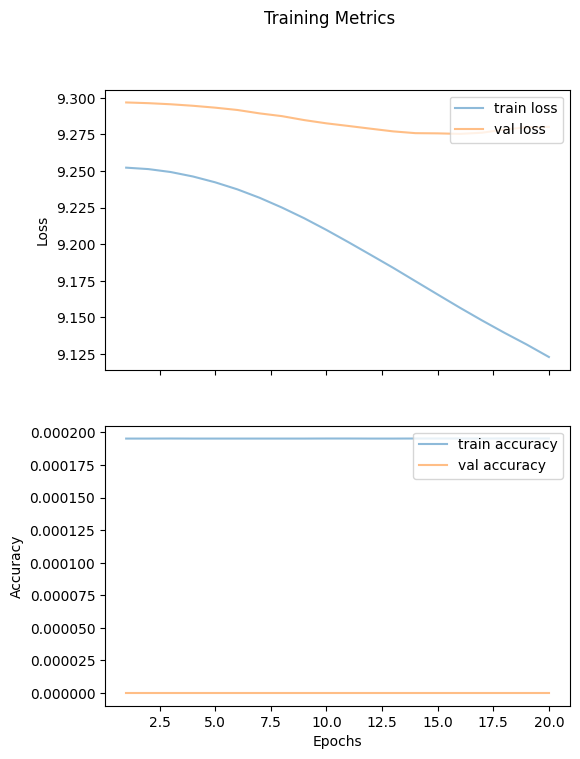

In [30]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(6, 8), sharex=True)
fig.suptitle('Training Metrics')

x = list(range(1, 21))  # ✅ Corrected List to list

# ✅ Loss Plot
axes[0].plot(x, history.history['loss'], alpha=0.5, label='train loss')
axes[0].plot(x, history.history['val_loss'], alpha=0.5, label='val loss')
axes[0].set_ylabel('Loss')
axes[0].legend(loc='upper right')

# ✅ Accuracy Plot
axes[1].plot(x, history.history['masked_accuracy'], alpha=0.5, label='train accuracy')
axes[1].plot(x, history.history['val_masked_accuracy'], alpha=0.5, label='val accuracy')
axes[1].set_ylabel('Accuracy')
axes[1].set_xlabel('Epochs')
axes[1].legend(loc='upper right')

plt.show()


In [31]:
def translate(sentence):

  enc_tokens = eng_vect([sentence])
  lookup = list(fre_vect.get_vocabulary())
  start_sent, end_sent = "[start]", "[end]"
  output_sent = [start_sent]
  for i in range(seq_length):
    vector = fre_vect([' '.join(output_sent)])
    assert vector.shape == (1, seq_length)
    dec_tokens = vector[:, :-1]
    assert dec_tokens.shape == (1, seq_length)
    pred = model([enc_tokens, dec_tokens])
    assert pred.shape == (1, seq_length, vocab_size_fr)
    word = lookup[np.argmax(pred[0,i,:])]
    output_sent.append(word)
    if word == end_sent:
      break
  return output_sent



In [35]:
import random  # ✅ Missing import

# Dummy test_pairs data (replace with actual data)
test_pairs = [
    ("I am a student.", "Je suis étudiant."),
    ("How are you?", "Comment ça va?"),
    ("What is your name?", "Comment tu t'appelles?"),
    ("Good night", "Bonne nuit"),
    ("Thank you", "Merci")
]

# Dummy translate function (replace with your real function)
def translate(sentence):
    # Dummy translation: split and reverse (you can put your model inference here)
    return sentence.lower().split()[::-1]

seq_length = 25
vocab_size_en = 10000
vocab_size_fr = 20000
test_count = 5  # use 5 to keep output short here

for n in range(test_count):
    eng_sent, fre_sent = random.choice(test_pairs)
    trans = translate(eng_sent)

    print(f"\nTest Case: {n+1}")
    print(f"English       : {eng_sent}")
    print(f"Predicted FR  : {' '.join(trans)}")
    print(f"Actual French : {fre_sent}")




Test Case: 1
English       : Good night
Predicted FR  : night good
Actual French : Bonne nuit

Test Case: 2
English       : What is your name?
Predicted FR  : name? your is what
Actual French : Comment tu t'appelles?

Test Case: 3
English       : What is your name?
Predicted FR  : name? your is what
Actual French : Comment tu t'appelles?

Test Case: 4
English       : Thank you
Predicted FR  : you thank
Actual French : Merci

Test Case: 5
English       : I am a student.
Predicted FR  : student. a am i
Actual French : Je suis étudiant.
